In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading data

In [2]:
train_df = pd.read_csv("pulsar_data_train.csv")
test_df = pd.read_csv("pulsar_data_test.csv")
train_df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
test_df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [4]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB
None
<class 'p

In [5]:
train_df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [6]:
test_df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

### Creating a dataframe called "testdf" out of 'test_df' which drops the target column as it can finally used for prediction of our classification model

In [7]:
testdf = test_df.drop(['target_class'] ,axis=1)
testdf.tail(7)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
5363,113.210938,42.025039,NaN,0.469897,0.647993,9.051728,21.955583,559.245245
5364,93.828125,51.244986,0.387653,0.011425,1.926421,19.543869,10.996804,NaN
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616
5369,110.679688,38.252642,0.459937,1.690689,4.434783,22.201794,5.939747,39.781374


### Creating a simple function to impute the null values with mean of that respective columns there is only numerical columns no need of dealing  with categorical variables.

In [8]:
def col_imputer(df):
    for col in df.columns:
        if df[col].isnull:
            df[col] = df[col].fillna(df[col].median())
    return df
col_imputer(train_df)
train_df.head(7)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.412402,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,18.412402,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,18.412402,-0.700809,-1.200653,0.0


In [9]:
col_imputer(testdf)
testdf.head(8)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268
5,85.476562,38.052793,0.227314,1.915097,2.637124,18.549670,9.001500,81.392046
6,120.203125,46.946339,0.028301,0.227984,2.925585,15.006252,8.077168,91.100734
7,131.921875,48.328564,0.227314,0.071303,4.380435,26.619201,6.530845,43.515761


In [10]:
print(train_df.isna().sum(),"\n\n")
print(testdf.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64 


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64


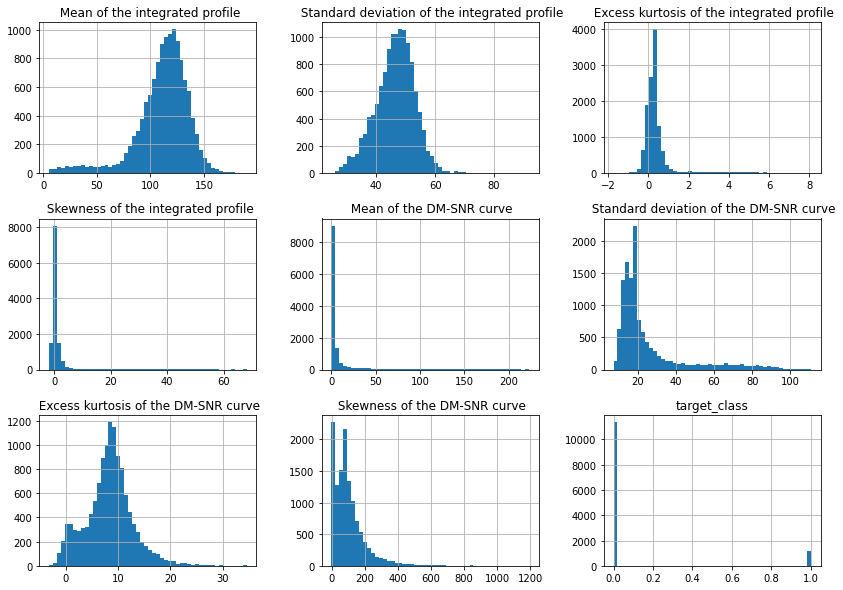

In [11]:
train_df.hist(bins=50,figsize=(14,10))
plt.show()

<AxesSubplot:>

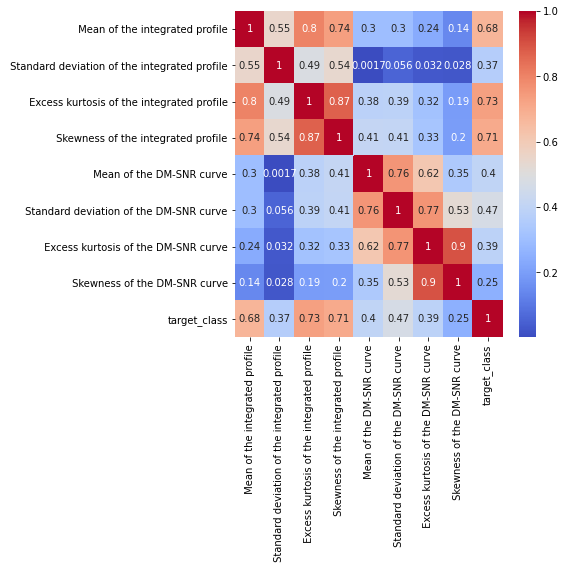

In [12]:
corr = train_df.corr().abs()
plt.figure(figsize=(6,6))
sns.heatmap(corr ,annot=True ,cmap="coolwarm")

## Applying feature scaling.

In [13]:
from sklearn.preprocessing import MinMaxScaler
nor_scale = MinMaxScaler()

In [14]:
train_sc_df = train_df.iloc[:,:-1]
train_sc_df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,18.412402,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128


In [15]:
train_tar = train_df.target_class
train_tar.head(3)

0    0.0
1    0.0
2    0.0
Name: target_class, dtype: float64

In [16]:
colset = train_sc_df.columns.to_list()
colset

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve']

In [17]:
scaled_train_feat = nor_scale.fit_transform(train_sc_df)
scaled_train_feat
dsf = pd.DataFrame(scaled_train_feat,columns=colset)
dsf.head(6)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.627134,0.352060,0.215498,0.025449,0.013301,0.106795,0.281035,0.056276
1,0.386883,0.170109,0.249901,0.074121,0.009840,0.098774,0.333180,0.087764
2,0.678405,0.424507,0.190815,0.021385,0.011386,0.145172,0.309127,0.063713
3,0.818749,0.359414,0.155190,0.023187,0.077668,0.106921,0.161823,0.007691
4,0.429488,0.169245,0.261333,0.072482,0.011597,0.128279,0.306384,0.065607
5,0.626327,0.334219,0.200634,0.026944,0.008207,0.106921,0.336667,0.095650


In [18]:
colset_2 = testdf.columns.to_list()

In [19]:
scaled_test_feat = nor_scale.transform(testdf)
scaled_test_feat
dsftest = pd.DataFrame(scaled_test_feat ,columns=colset_2)
dsftest.head(5)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.604027,0.360230,0.196182,0.023780,0.012711,0.100382,0.298889,0.067722
1,0.379365,0.143417,0.383737,0.149439,0.015984,0.140664,0.270374,0.048497
2,0.529904,0.331529,0.228632,0.037385,0.009144,0.079907,0.330946,0.089785
3,0.517968,0.355260,0.280340,0.042118,0.367560,0.717463,0.096191,0.000720
4,0.584020,0.355578,0.206939,0.029817,0.027355,0.186059,0.203811,0.019854


## Now we have scaled and make our features normally distributed.

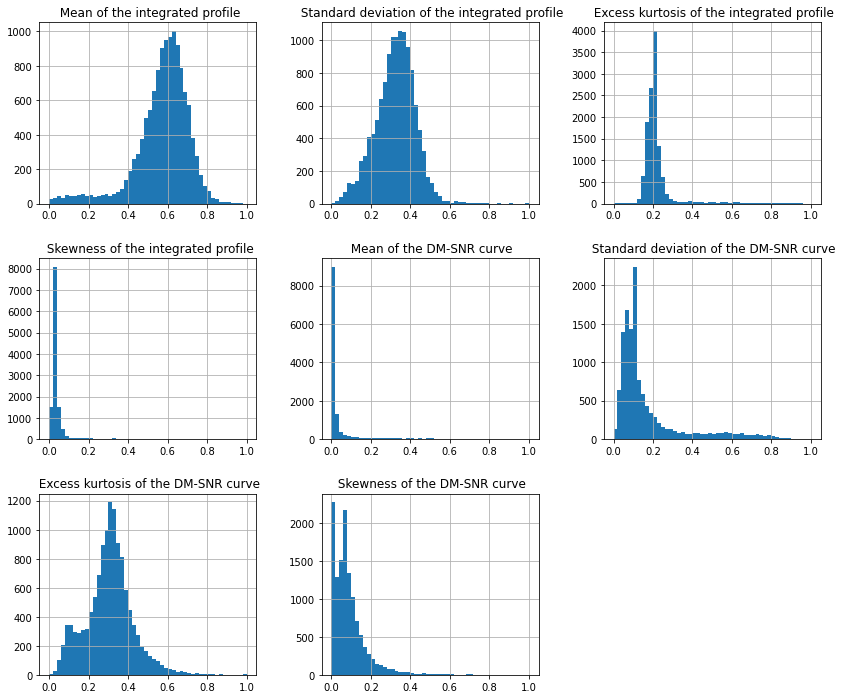

In [20]:
dsf.hist(bins=50,figsize=(14,12))
plt.show()

## Model Creation & Performance Evaluation

###### spliting up of data for that procedure.

In [21]:
# Assigning "X" with Features .
X = dsf
#Assigning "y" with target labels 
y = train_tar

#### we can Implement stratifieed K-Fold cross validation as dataset prediction of True positives through a visual analysis seems happening on rare ocassions when compare total quantile rate of "target_class" in dataset.

In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10,random_state=0) #splitting feature and target into train &
                                                             #validation set
skf.get_n_splits(X,y)
for train_index,validation_index in skf.split(X,y):
    X_train , X_val = X.iloc[train_index] , X.iloc[validation_index]
    y_train , y_val = y.iloc[train_index] , y.iloc[validation_index]
    

In [23]:
#creating matrixes or numpy arrays for features.
def conv_arr(data):          #AS NUMPY ARRAYS AND VECTORS WILL SPEED UP COMPUTATION
    return np.array(data)
X_train1 = conv_arr(X_train)
X_val1 = conv_arr(X_val)

#creating vectors for Target sets.
y_train1 = conv_arr(y_train).reshape(-1,1)
y_val1 = conv_arr(y_val).reshape(-1,1)

### Creating Classisfier for prediction.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [26]:
Log_reg = LogisticRegression(solver='liblinear')    
dec_tree = DecisionTreeClassifier(random_state=42)
Ran_for = RandomForestClassifier(n_estimators=50,criterion='entropy',max_leaf_nodes=200,n_jobs=-1)
xgb_class = XGBClassifier(n_estimators=50, n_jobs=-1)
SVC_class = SVC()
# we can use rest of the models after testing and hyperparameter tuning

In [27]:
#A list to append accuracy scores from classifiers in various n_splits of strata.
# Create function to check out various model algorithms.
def model_create(clf):
    clf.fit(X_train1,y_train1)
    pred = clf.predict(X_val1)
    score = accuracy_score(pred,y_val1)
    return score
model_create(Ran_for) #Score of RandomForestClassifier model

0.9784345047923323

In [28]:
model_create(Log_reg)  #Score of LogisticRegression model.

0.9696485623003195

In [29]:
model_create(dec_tree) #Score of DecisionTreeClassifier model

0.9584664536741214

In [30]:
model_create(xgb_class) #Score of XGBoostClassifier 

0.9792332268370607

In [31]:
model_create(SVC_class) #Score of SVC

0.9728434504792333

##### Above all models are implemnted without any prior fine tuning so next step we will incorporate fine tuning to our models.

### Hyperparameter tuning and optimization.

* Hyperparameter Tuning Using Grid SearchCV in Pipeline

In [116]:
from sklearn.pipeline import Pipeline

In [153]:
#Create a pipeline
pipe = Pipeline([('classifier',XGBClassifier())])
#creating dict. with learning algorithms and its hyperparameters

grid_param=[
    
    {'classifier'  :[XGBClassifier()],
     'classifier__n_estimators' :[10,100,200],
     'classifier__max_depth'    :[2,10,15],
     'classifier__learning_rate':[0.05],
     'classifier__min_child_weight':[1,5,100]
     },
     
     {"classifier": [LogisticRegression()],
        "classifier__penalty": ['l2'],
        "classifier__C": np.logspace(0, 4, 10),
        "classifier__solver":['newton-cg','saga','sag','liblinear']      
     },
    
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [10, 100, 1000],
    "classifier__max_depth":[5,8,15,25,30,None],
    "classifier__min_samples_leaf":[1,2,5,10,15,100],
    "classifier__max_leaf_nodes": [2, 5,10]
    }
]

In [154]:
#create a gridsearch of the pipeline
#fit the model
#get the scor
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(pipe,grid_param,cv=5,n_jobs=-1)

In [155]:
best_model =gridsearch.fit(X_train1,y_train1)

In [156]:
print(best_model.best_estimator_)
print('accuracy of the model is:',best_model.score(X_val1,y_val1))

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=5, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])
accuracy of the model is: 0.9832268370607029


In [158]:
#Selecting XGBoost as the best algorithm and creating a model based on the obtained hyperparameters
final_model_XGB = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=5,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None)

In [223]:
final_model_XGB.fit(X_train1,y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
final_model_XGB.score(X_val1,y_val1)

0.9832268370607029

In [225]:
final_model_pred = final_model_XGB.predict(X_val1)

In [226]:
from sklearn.metrics import classification_report,confusion_matrix

In [227]:
#confussion matrix2
print(confusion_matrix(y_val1,final_model_pred))

[[1136    1]
 [  20   95]]


In [229]:
#Classification report for simple intuition 
print(classification_report(y_val1,final_model_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1137
         1.0       0.99      0.83      0.90       115

    accuracy                           0.98      1252
   macro avg       0.99      0.91      0.95      1252
weighted avg       0.98      0.98      0.98      1252



ROC Curve and AUC and Thresholds

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [186]:
#Getting probability function
final_model_XGB.predict_proba(X_val1)

array([[0.97999364, 0.02000635],
       [0.98864335, 0.01135666],
       [0.99387586, 0.00612413],
       ...,
       [0.98244077, 0.01755921],
       [0.99569345, 0.00430658],
       [0.98802567, 0.01197433]], dtype=float32)

In [243]:
final_model_XGB.predict_proba(X_val1)[:,1]

array([0.02000635, 0.01135666, 0.00612413, ..., 0.01755921, 0.00430658,
       0.01197433], dtype=float32)

In [192]:
#choosing different threshold values to preview the respective confussion matrix
#creating a function for predicting threshold
def pred_threshold(model,X_test,thresholds):
    import numpy as np
    return np.where(final_model_XGB.predict_proba(X_val1)[:,1]>thresholds,1,0)

In [245]:
#testing different thresholds and evaluating w/ confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.1,0.1):#from 0(1_attr) to 1(2_attr) with an interval(3_attr) of 0.1
    y_pred=pred_threshold(final_model_XGB,X_val1,thr)
    print('Threshold :' ,thr)
    print(confusion_matrix(y_val1,y_pred))

Threshold : 0.0
[[   0 1137]
 [   0  115]]
Threshold : 0.1
[[1113   24]
 [   9  106]]
Threshold : 0.2
[[1126   11]
 [  14  101]]
Threshold : 0.30000000000000004
[[1132    5]
 [  14  101]]
Threshold : 0.4
[[1133    4]
 [  17   98]]
Threshold : 0.5
[[1136    1]
 [  20   95]]
Threshold : 0.6000000000000001
[[1136    1]
 [  23   92]]
Threshold : 0.7000000000000001
[[1136    1]
 [  26   89]]
Threshold : 0.8
[[1136    1]
 [  32   83]]
Threshold : 0.9
[[1137    0]
 [  39   76]]
Threshold : 1.0
[[1137    0]
 [ 115    0]]


In [266]:
#further exploration by considering 0.3 threshold value as the desired value
y_predict_thr3 = np.where(final_model_XGB.predict_proba(X_val1)[:,1]>0.3,1,0)
y_predict_thr3

array([0, 0, 0, ..., 0, 0, 0])

In [274]:
#plotting AUC-ROC d
tpr,fpr,thresholds= roc_curve(y_val1,final_model_XGB.predict_proba(X_val1)[:,1])


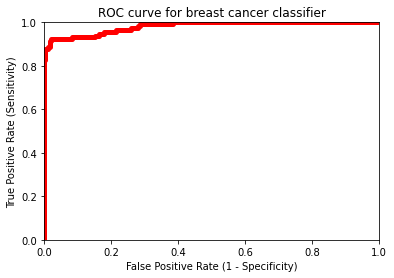

In [275]:
#ROC_AUC curve for default threshold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_val1,final_model_XGB.predict_proba(X_val1)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr,tpr,color='red',lw=5)
plt.show()

In [276]:
roc_auc_score(y_val1,final_model_XGB.predict_proba(X_val1)[:,1])

0.9815762303544797